#**Getting the data**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install tensorflow-text
!pip install transformers
import tensorflow_text

In [ ]:
# replacing the null values with empty string
news_dataset = news_dataset.fillna('')#fillna fills with whatever we mention

#**Helper functions**

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
def calculate_metrics(y_true, y_preds):
  model_results={"Accuracy": accuracy_score(y_true, y_preds),
                 "Precision": precision_score(y_true, y_preds),
                 "Recall": recall_score(y_true, y_preds),
                 "f1_score": f1_score(y_true, y_preds),
                 }
  return model_results

#**ML_Approach**

**Importing dependencies**

In [ ]:
import numpy as np
import pandas as pd
import re#useful for searching the text in the document
from nltk.corpus import stopwords# corpus: body of the particular text,nltk natural language tool kit,the text we are going to work,stopwords are those words which doesnt add value to our paragraph or text(the,an,a,..)
from nltk.stem.porter import PorterStemmer#stemming takes the word removes prefix and suffix of the word and returns the root of the word/root word
from sklearn.feature_extraction.text import TfidfVectorizer# TfidfVectorizer convert text into feature vectors
from sklearn.model_selection import train_test_split # splits train and test data
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn import tree
from sklearn.metrics import accuracy_score

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
# separating the data & label
X = news_dataset.drop(columns='label', axis=1)# axis = 1 represents columns
Y = news_dataset['label']

Stemming:
stemming is the process of reducing a word to its rootword
example:
actor,actress,acting-->act(rootword)

we do this for increasing performance

In [ ]:
port_stem = PorterStemmer()

In [ ]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)# re :searching paragraph or text, sub :substitute certain values,˄:exclusion (we are taking only alphabets ,excluding other than the  thing which is present in the set) other than alphabets are written as ' '(space)
    stemmed_content = stemmed_content.lower()# converting all letters to lower case
    stemmed_content = stemmed_content.split()# splitting to converted to list
    stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # returning only the rootwords for the words which are not present in the stopwords lib from stemmed content
    stemmed_content = ' '.join(stemmed_content)# joining the words
    return stemmed_content

In [ ]:
news_dataset['content'] = news_dataset['title']+' '+news_dataset['text']#creating new column called content

In [ ]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [ ]:
#separating the data and label
X = news_dataset['content'].values
Y = news_dataset['label'].values

In [ ]:
# converting the textual data to nummerical data
vectorizer = TfidfVectorizer()# term frequency inverse documentary freuency vectorizer , Tf;counts the no. of times the particular word is repeated in the paragraph,idf: finds the repeating words which doesnt add much difference
vectorizer.fit(X)

X = vectorizer.transform(X)

**Splitting the dataset to training and test data**

In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2,stratify =Y,random_state =2)# stratify segregates real and fake news in same proportion as that of original X,Y;

##**Model_LR**

In [ ]:
model_lr = LogisticRegression()
model_lr.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
X_test_prediction = model_lr.predict(X_test)
model_lr_results=calculate_metrics(Y_test,X_test_prediction)
model_lr_results

{'Accuracy': 0.9486379704720316,
 'Precision': 0.943088352348103,
 'Recall': 0.9579571486322598,
 'f1_score': 0.9504646032488802}

##**Model_KNN**

In [ ]:
model_kmeans = KNeighborsClassifier()
model_kmeans.fit(X_train,Y_train)

KNeighborsClassifier()

In [ ]:
X_test_prediction = model_kmeans.predict(X_test)
model_kmeans_results=calculate_metrics(Y_test,X_test_prediction)
model_kmeans_results

{'Accuracy': 0.6894711305191654,
 'Precision': 0.6302595446895207,
 'Recall': 0.9587656650047164,
 'f1_score': 0.760555852485302}

##**Model_SVM**

In [ ]:
model_svm = svm.SVC(kernel='linear')
model_svm.fit(X_train,Y_train)

In [ ]:
X_test_prediction = model_svm.predict(X_test)
model_svm_results=calculate_metrics(Y_test,X_test_prediction)
model_svm_results

##**Model_DT**

In [ ]:
model_dt= tree.DecisionTreeClassifier(max_depth = 64)
model_dt.fit(X_train, Y_train)

In [ ]:
X_test_prediction = model_dt.predict(X_test)
model_dt_results=calculate_metrics(Y_test,X_test_prediction)
model_dt_results

##**Model_XGBOOST**

In [ ]:
model_xgboost = XGBClassifier()
model_xgboost.fit(X_train, Y_train)

In [ ]:
xgboost_test_prediction = model_xgboost.predict(X_test)
model_xgboost_results=calculate_metrics(Y_test,xgboost_test_prediction)
model_xgboost_results

##**Model_LGBM**

In [ ]:
model_lgbm = LGBMClassifier()
model_lgbm.fit(X_train, Y_train)

In [ ]:
lgbm_test_prediction = model_lgbm.predict(X_test)
model_lgbm_results=calculate_metrics(Y_test,lgbm_test_prediction)
model_lgbm_results

##**Model_RF**

In [ ]:
model_rf = RandomForestClassifier(n_estimators= 10, criterion="entropy")
model_rf.fit(X_train,Y_train)

In [ ]:
rf_test_prediction = model_rf.predict(X_test)
model_rf_results=calculate_metrics(Y_test,rf_test_prediction)
model_rf_results

##**Model_Ensemble**

In [ ]:
def ensemble(predictions):
  return np.mean(predictions, axis=0)

In [ ]:
predictions = [lr_test_prediction,knn_test_prediction,svm_test_prediction,dt_test_prediction,xgboost_test_prediction,lgbm_test_prediction,rf_test_prediction]
ensemble_test_prediction = ensemble(predictions)

In [ ]:
ensemble_test_prediction  = np.where(ensemble_test_prediction>=0.5,1,0)
model_ensemble_results=calculate_metrics(Y_test,ensemble_test_prediction)
model_ensemble_results

##**Conclusion**

In [ ]:
results_df= pd.DataFrame({"model_LR": model_lr_results,
                          "model_KNN": model_knn_results,
                          "model_SVM": model_svm_results,
                          "model_DT": model_dt_results,
                          "model_XGBOOST": model_xgboost_results,
                          "model_LGBM": model_lgbm_results,
                          "model_RF": model_rf_results,
                          "model_ENSEMBLE": model_ensemble_results}).T

results_df

In [ ]:
results_df.plot(kind="bar", title="Machine Learning Approach").legend(bbox_to_anchor=(1,1));

#**DL_Aproach**

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
country_no=train_df.Country.unique()
country=train_df.Country
print(len(country_no)) #193 unique countries

193


In [ ]:
from sklearn import preprocessing

# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'Country'.
train_df['Country']= label_encoder.fit_transform(train_df['Country'])
train_df['Status']= label_encoder.fit_transform(train_df['Status'])


In [ ]:
train_df

,Unnamed: 0,Country,Year,Status,Power Level,Civilian Deaths,Military Accidents,Substance Abuse,Military Investment,Air Force,...,Submarines,Educational Investment,Literacy,Revolts,GDP,Population,Offense,Defense,Political Stability,International Reputation
0,1,0,2022,1,59.73,271.0,62,-0.25,73.83,59.0,...,58.0,8.06,62.0,-0.21,612.86,327582.0,17.16,17.68,0.44,10.57
1,2,0,2021,1,60.50,268.0,66,-0.67,73.66,71.0,...,60.0,8.08,65.0,-0.04,631.58,31731688.0,18.28,17.85,0.72,10.40
2,3,0,2020,1,60.09,271.0,70,-0.17,77.76,65.0,...,65.0,8.71,70.0,-0.21,669.50,3696953.0,16.85,18.46,0.99,9.52
3,4,0,2019,1,58.88,279.0,70,0.69,6.95,72.0,...,65.0,8.34,72.0,-0.60,63.67,2978596.0,17.72,18.11,0.84,9.82
4,5,0,2018,1,59.26,272.0,74,0.07,79.82,70.0,...,67.0,9.40,66.0,-0.12,553.89,2883166.0,18.91,18.76,0.52,9.14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2750,2933,192,2012,1,44.11,721.0,29,4.37,-0.29,68.0,...,66.0,7.04,62.0,34.62,454.15,12777508.0,9.01,10.22,0.15,9.89
2751,2934,192,2011,1,44.42,720.0,27,3.58,-0.43,8.0,...,8.0,6.33,70.0,37.70,453.82,12633894.0,9.80,9.64,-0.19,9.68
2752,2935,192,2010,1,45.22,75.0,25,3.89,-1.33,76.0,...,74.0,6.63,71.0,40.36,57.22,125524.0,1.06,1.49,-0.04,10.91
2753,2936,192,2009,1,45.72,686.0,24,1.33,0.16,68.0,...,75.0,6.75,75.0,41.58,548.08,12366171.0,2.12,1.91,-0.15,9.83


##**Model_1**:MLP

In [ ]:
news_dataset.label.value_counts() #balanced dataset

1    37106
0    35028
Name: label, dtype: int64

In [ ]:
data= train_df.drop("Power Level", axis=1)
labels=train_df["Power Level"]

len(data), len(labels)

(2755, 2755)

In [ ]:
labels

0       59.73
1       60.50
2       60.09
3       58.88
4       59.26
        ...  
2750    44.11
2751    44.42
2752    45.22
2753    45.72
2754    45.63
Name: Power Level, Length: 2755, dtype: float64

In [ ]:
# model_1=tf.keras.Sequential([tf.keras.layers.Dense(64, activation="relu"),
#                              tf.keras.layers.Dense(32, activation="relu"),
#                              tf.keras.layers.Dense(1, activation="linear")])

model_1 = tf.keras.Sequential([tf.keras.layers.Dense(64, activation="relu"),
                             tf.keras.layers.Dense(32, activation="relu"),
                             tf.keras.layers.Dense(1, activation="linear")])
model_1.compile(loss="mae",
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])

In [ ]:
model_1.summary()

ValueError: ignored

**Splitting the data and fastening the load time**

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_labels, test_labels= train_test_split(data, labels)

train_dataset=tf.data.Dataset.from_tensor_slices((train_data, train_labels)).batch(32).prefetch(tf.data.AUTOTUNE)
test_dataset=tf.data.Dataset.from_tensor_slices((test_data, test_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

In [ ]:
train_dataset

<PrefetchDataset element_spec=(TensorSpec(shape=(None, 22), dtype=tf.float64, name=None), TensorSpec(shape=(None,), dtype=tf.float64, name=None))>

In [ ]:
history_1=model_1.fit(train_data, train_labels,
                      epochs=5,
                      # callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True),
                      #            tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=1),
                      #            tf.keras.callbacks.TensorBoard(log_dir="tensorboard/model_MLP")],
                      validation_data=(test_data, test_labels))

Epoch 1/5
65/65 [==============================] - 1s 6ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 2/5
65/65 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 3/5
65/65 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 4/5
65/65 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan
Epoch 5/5
65/65 [==============================] - 0s 4ms/step - loss: nan - mae: nan - val_loss: nan - val_mae: nan


**Loss curves**

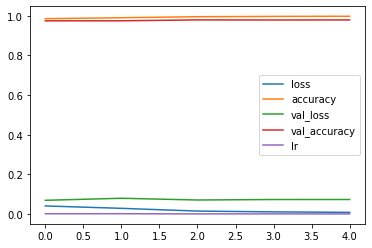

In [ ]:
pd.DataFrame(history_1.history).plot();

In [ ]:
y_preds=model_1.predict(test_dataset)
model_1_results= calculate_metrics(test_labels, y_preds.round().squeeze())

564/564 [==============================] - 4s 6ms/step


In [ ]:
model_1_results

{'Accuracy': 0.9797604524786514,
 'Precision': 0.980151024811219,
 'Recall': 0.9804683284773928,
 'f1_score': 0.9803096509683336}

##**Model_2**:CNN

In [ ]:
word_embedding_2=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_2(x)
x= tf.keras.layers.Conv1D(64, 3, activation="relu")(x)
x= tf.keras.layers.Conv1D(32, 3, activation="relu")(x)
x=tf.keras.layers.GlobalMaxPool1D()(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid", dtype=tf.float32)(x)

model_2=tf.keras.Model(inputs, outputs)

model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 1994)             0         
 torization)                                                     
                                                                 
 embedding_1 (Embedding)     (None, 1994, 128)         2560000   
                                                                 
 conv1d (Conv1D)             (None, 1992, 64)          24640     
                                                                 
 conv1d_1 (Conv1D)           (None, 1990, 32)          6176      
                                                                 
 global_max_pooling1d_1 (Glo  (None, 32)               0         
 balMaxPooling1D)                                          

In [ ]:
history_2=model_2.fit(train_dataset,
                          epochs=5,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=1),
                                     tf.keras.callbacks.TensorBoard(log_dir="tensorboard/model_CNN")],
                          validation_data=(test_dataset),
                      validation_steps=int(0.1*len(test_dataset)))

Epoch 1/5
1691/1691 [==============================] - 141s 79ms/step - loss: 0.1027 - accuracy: 0.9591 - val_loss: 0.0597 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 2/5
1691/1691 [==============================] - 21s 12ms/step - loss: 0.0239 - accuracy: 0.9915 - val_loss: 0.0606 - val_accuracy: 0.9777 - lr: 0.0010
Epoch 3/5
1691/1691 [==============================] - 22s 13ms/step - loss: 0.0066 - accuracy: 0.9979 - val_loss: 0.0891 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 4/5
1691/1691 [==============================] - 21s 12ms/step - loss: 0.0018 - accuracy: 0.9996 - val_loss: 0.0730 - val_accuracy: 0.9827 - lr: 1.0000e-04
Epoch 5/5
1691/1691 [==============================] - 22s 13ms/step - loss: 7.2696e-04 - accuracy: 0.9999 - val_loss: 0.0737 - val_accuracy: 0.9821 - lr: 1.0000e-04


**Loss curves**

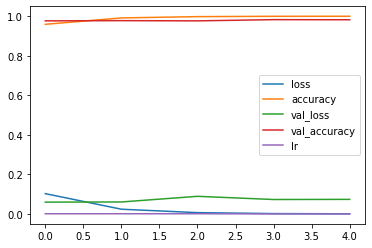

In [ ]:
pd.DataFrame(history_2.history).plot();

In [ ]:
y_preds= model_2.predict(test_dataset)
model_2_results= calculate_metrics(test_labels, y_preds.round().squeeze())

564/564 [==============================] - 3s 6ms/step


In [ ]:
model_2_results

{'Accuracy': 0.9838638127980481,
 'Precision': 0.9828921885087153,
 'Recall': 0.9857559080608611,
 'f1_score': 0.9843219654113463}

##**Model_3**: RNN(LSTM, GRU, Bidirectional)

In [ ]:
word_embedding_3=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_3(x)
x= tf.keras.layers.LSTM(32, return_sequences=True)(x)
x= tf.keras.layers.GRU(32, return_sequences=True)(x)
x= tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(16))(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_3=tf.keras.Model(inputs, outputs)

model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [ ]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 1994)             0         
 torization)                                                     
                                                                 
 embedding_2 (Embedding)     (None, 1994, 128)         2560000   
                                                                 
 lstm (LSTM)                 (None, 1994, 32)          20608     
                                                                 
 gru (GRU)                   (None, 1994, 32)          6336      
                                                                 
 bidirectional (Bidirectiona  (None, 32)               6272      
 l)                                                        

In [ ]:
history_3=model_3.fit(train_dataset,
                      epochs=5,
                      callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=1),
                                 tf.keras.callbacks.TensorBoard(log_dir="tensorboard/model_RNN")],
                      validation_data=(test_dataset),
                      validation_steps=int(0.1*len(test_dataset)))

Epoch 1/5
1691/1691 [==============================] - 439s 254ms/step - loss: 0.1698 - accuracy: 0.9334 - val_loss: 0.1741 - val_accuracy: 0.9598 - lr: 0.0010
Epoch 2/5
1691/1691 [==============================] - 323s 191ms/step - loss: 0.0923 - accuracy: 0.9694 - val_loss: 0.0900 - val_accuracy: 0.9699 - lr: 0.0010
Epoch 3/5
1691/1691 [==============================] - 321s 190ms/step - loss: 0.0575 - accuracy: 0.9814 - val_loss: 0.0786 - val_accuracy: 0.9766 - lr: 0.0010
Epoch 4/5
1691/1691 [==============================] - 321s 190ms/step - loss: 0.0469 - accuracy: 0.9858 - val_loss: 0.0881 - val_accuracy: 0.9704 - lr: 0.0010
Epoch 5/5
1691/1691 [==============================] - 320s 189ms/step - loss: 0.0241 - accuracy: 0.9933 - val_loss: 0.0676 - val_accuracy: 0.9766 - lr: 1.0000e-04


**Loss curves**

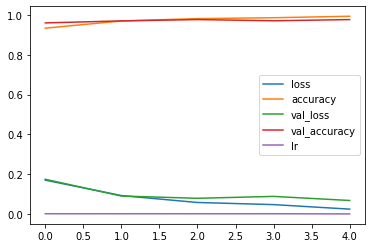

In [ ]:
pd.DataFrame(history_3.history).plot();

In [ ]:
y_preds= model_3.predict(test_dataset)
model_3_results=calculate_metrics(test_labels, y_preds.round().squeeze())

564/564 [==============================] - 54s 93ms/step


In [ ]:
model_3_results

{'Accuracy': 0.9747144283020961,
 'Precision': 0.9633953928684128,
 'Recall': 0.9883457429588863,
 'f1_score': 0.9757110898050495}

##**Model_4**: Transfer_learning

In [ ]:
import tensorflow_hub as hub

link="https://tfhub.dev/google/universal-sentence-encoder/4"
embedding_layer= hub.KerasLayer(link)

In [ ]:
inputs= tf.keras.layers.Input([], dtype="string")
x=embedding_layer(inputs)
x= tf.keras.layers.Dense(64, activation="relu")(x)
x= tf.keras.layers.Dense(32, activation="relu")(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_4=tf.keras.Model(inputs, outputs)

model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


In [ ]:
model_4.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None,)]                 0         
                                                                 
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense_5 (Dense)             (None, 64)                32832     
                                                                 
 dense_6 (Dense)             (None, 32)                2080      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 256,832,769
Trainable params: 34,945
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
history_4=model_4.fit(train_dataset,
                          epochs=5,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=1),
                                     tf.keras.callbacks.TensorBoard(log_dir="tensorboard/model_TL")],
                          validation_data=(test_dataset),
                      validation_steps=int(0.1*len(test_dataset)))

Epoch 1/5
1691/1691 [==============================] - 170s 98ms/step - loss: 0.3065 - accuracy: 0.8717 - val_loss: 0.2652 - val_accuracy: 0.8878 - lr: 0.0010
Epoch 2/5
1691/1691 [==============================] - 161s 95ms/step - loss: 0.2323 - accuracy: 0.9041 - val_loss: 0.2456 - val_accuracy: 0.9007 - lr: 0.0010
Epoch 3/5
1691/1691 [==============================] - 161s 95ms/step - loss: 0.2006 - accuracy: 0.9188 - val_loss: 0.2410 - val_accuracy: 0.9057 - lr: 0.0010
Epoch 4/5
1691/1691 [==============================] - 165s 98ms/step - loss: 0.1775 - accuracy: 0.9291 - val_loss: 0.2372 - val_accuracy: 0.9107 - lr: 0.0010
Epoch 5/5
1691/1691 [==============================] - 160s 95ms/step - loss: 0.1589 - accuracy: 0.9372 - val_loss: 0.2385 - val_accuracy: 0.9107 - lr: 0.0010


**Loss curves**

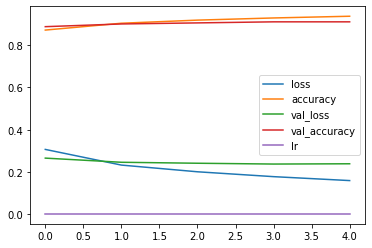

In [ ]:
pd.DataFrame(history_4.history).plot();

In [ ]:
y_preds= model_4.predict(test_dataset)
model_4_results=calculate_metrics(test_labels, y_preds.round().squeeze())

564/564 [==============================] - 48s 85ms/step


In [ ]:
model_4_results

{'Accuracy': 0.914993900410336,
 'Precision': 0.8919521589296574,
 'Recall': 0.9496061292759254,
 'f1_score': 0.9198766529033607}

##**Model_5**: custom+transfer_learning

In [ ]:
word_embedding_4=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
input_custom=tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(input_custom)
x=word_embedding_4(x)
output_custom=tf.keras.layers.GlobalMaxPool1D()(x)

model_custom=tf.keras.Model(input_custom, output_custom)

input_tl=tf.keras.layers.Input([], dtype="string")
output_tl=embedding_layer(input_tl)

model_tl=tf.keras.Model(input_tl, output_tl)

concatenate_layer= tf.keras.layers.Concatenate()([model_custom.output, model_tl.output])

x= tf.keras.layers.Dense(64, activation="relu")(concatenate_layer)
x= tf.keras.layers.Dense(32, activation="relu")(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

#model_5
model_5= tf.keras.Model(inputs=[model_custom.input, model_tl.input],
                        outputs=outputs)

model_5.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

In [ ]:
model_5.summary()

Model: "model_6"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_5 (InputLayer)           [(None, 1)]          0           []                               
                                                                                                  
 text_vectorization (TextVector  (None, 1994)        0           ['input_5[0][0]']                
 ization)                                                                                         
                                                                                                  
 embedding_3 (Embedding)        (None, 1994, 128)    2560000     ['text_vectorization[3][0]']     
                                                                                                  
 input_6 (InputLayer)           [(None,)]            0           []                         

**Dual input**

In [ ]:
train_dataset_dual_inputs=tf.data.Dataset.from_tensor_slices((train_text, train_text))
train_dataset_dual_labels=tf.data.Dataset.from_tensor_slices(train_labels)
train_dataset_dual=tf.data.Dataset.zip((train_dataset_dual_inputs, train_dataset_dual_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

test_dataset_dual_inputs=tf.data.Dataset.from_tensor_slices((test_text, test_text))
test_dataset_dual_labels=tf.data.Dataset.from_tensor_slices(test_labels)
test_dataset_dual=tf.data.Dataset.zip((test_dataset_dual_inputs, test_dataset_dual_labels)).batch(32).prefetch(tf.data.AUTOTUNE)

train_dataset_dual, test_dataset_dual

(<PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>,
 <PrefetchDataset element_spec=((TensorSpec(shape=(None,), dtype=tf.string, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None)), TensorSpec(shape=(None,), dtype=tf.int64, name=None))>)

In [ ]:
history_5=model_5.fit(train_dataset_dual,
                          epochs=5,
                          callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=1),
                                     tf.keras.callbacks.TensorBoard(log_dir="tensorboard/model_Custom+TL")],
                          validation_data=(test_dataset_dual),
                      validation_steps=int(0.1*len(test_dataset)))

Epoch 1/5
1691/1691 [==============================] - 276s 162ms/step - loss: 0.1163 - accuracy: 0.9547 - val_loss: 0.0761 - val_accuracy: 0.9704 - lr: 0.0010
Epoch 2/5
1691/1691 [==============================] - 170s 101ms/step - loss: 0.0436 - accuracy: 0.9846 - val_loss: 0.1151 - val_accuracy: 0.9581 - lr: 0.0010
Epoch 3/5
1691/1691 [==============================] - 179s 106ms/step - loss: 0.0158 - accuracy: 0.9955 - val_loss: 0.0484 - val_accuracy: 0.9838 - lr: 1.0000e-04
Epoch 4/5
1691/1691 [==============================] - 173s 102ms/step - loss: 0.0112 - accuracy: 0.9970 - val_loss: 0.0487 - val_accuracy: 0.9844 - lr: 1.0000e-04
Epoch 5/5
1691/1691 [==============================] - 178s 105ms/step - loss: 0.0081 - accuracy: 0.9981 - val_loss: 0.0496 - val_accuracy: 0.9849 - lr: 1.0000e-04


**loss curves**

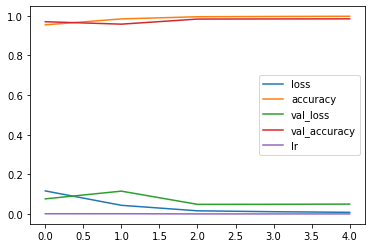

In [ ]:
pd.DataFrame(history_5.history).plot();

In [ ]:
y_preds= model_5.predict(test_dataset_dual)
model_5_results=calculate_metrics(test_labels, y_preds.round().squeeze())

564/564 [==============================] - 50s 89ms/step


In [ ]:
model_5_results

{'Accuracy': 0.9847510258400799,
 'Precision': 0.9822999356361296,
 'Recall': 0.9881299233840509,
 'f1_score': 0.9852063048039162}

##**model_6**: Ensemble

In [ ]:
word_embedding_5=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

word_embedding_6=tf.keras.layers.Embedding(input_dim= 20000,
                                         output_dim=128,
                                         input_length= word_98_percentile)

In [ ]:
inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_5(x)
x= tf.keras.layers.Dense(64, activation="relu")(x)
x=tf.keras.layers.GlobalMaxPool1D()(x)
x= tf.keras.layers.Dense(32, activation="relu")(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_1_ensemble=tf.keras.Model(inputs, outputs)

inputs= tf.keras.layers.Input((1,), dtype="string")
x=word_tokenizer(inputs)
x=word_embedding_6(x)
x= tf.keras.layers.Conv1D(64, 3, activation="relu")(x)
x= tf.keras.layers.Conv1D(32, 3, activation="relu")(x)
x=tf.keras.layers.GlobalMaxPool1D()(x)
outputs= tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_2_ensemble=tf.keras.Model(inputs, outputs)

In [ ]:
%%time
pred_probs=[]

for i in range(3):

  model_1_ensemble.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

  history_1_ensemble=model_1_ensemble.fit(train_dataset,
                            epochs=3,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=5, restore_best_weights=True),
                                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=2)],
                            validation_data=(test_dataset),
                            verbose=0,
                            validation_steps=int(0.1*len(test_dataset)))
  y_preds=model_1_ensemble.predict(test_dataset).squeeze()
  pred_probs.append(y_preds.tolist())

  model_2_ensemble.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["accuracy"])

  history_2_ensemble=model_2_ensemble.fit(train_dataset,
                            epochs=3,
                            callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True),
                                      tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=1)],
                            validation_data=(test_dataset),
                            verbose=0,
                            validation_steps=int(0.1*len(test_dataset)))
  y_preds=model_2_ensemble.predict(test_dataset).squeeze()
  pred_probs.append(y_preds.tolist())

564/564 [==============================] - 4s 6ms/step
CPU times: user 16min 27s, sys: 1min 5s, total: 17min 33s
Wall time: 19min 20s


In [ ]:
pred_probs_1=np.array(pred_probs)
pred_probs_2=pred_probs_1.T
ensemble_preds=np.mean(pred_probs_2, axis=1)

In [ ]:
model_6_results= calculate_metrics(test_labels, ensemble_preds.round())
model_6_results

{'Accuracy': 0.987745369856937,
 'Precision': 0.9862395183831434,
 'Recall': 0.9899643897701521,
 'f1_score': 0.9880984436426301}

##**Model_7**:BERT

In [ ]:
import tensorflow_hub as hub

In [ ]:
preprocess_link="https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"
bert="https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [ ]:
inputs= tf.keras.layers.Input((), dtype="string")
preprocess=hub.KerasLayer(preprocess_link)
x=preprocess(inputs)
bert=hub.KerasLayer(bert)
x=bert(x)
x=x["pooled_output"]
x=tf.keras.layers.Dense(64, activation="relu")(x)
x=tf.keras.layers.Dense(32, activation="relu")(x)
output=tf.keras.layers.Dense(1, activation="sigmoid")(x)

model_bert=tf.keras.Model(inputs, output)

In [ ]:
model_bert.summary()

In [ ]:
model_bert.compile(loss= tf.keras.losses.BinaryCrossentropy(),
                   optimizer=tf.keras.optimizers.Adam(),
                   metrics=["accuracy"])

In [ ]:
history_bert=model_bert.fit(train_dataset,
               epochs=5,
               batch_size=32,
               callbacks=[tf.keras.callbacks.EarlyStopping(monitor="val_accuracy", patience=2, restore_best_weights=True),
                                     tf.keras.callbacks.ReduceLROnPlateau(monitor="val_accuracy", patience=1),
                                     tf.keras.callbacks.TensorBoard(log_dir="tensorboard/model_bert")],
               validation_data=(test_dataset),
               validation_steps=int(0.1*len(test_dataset)))

**Loss curves**

In [ ]:
pd.DataFrame(history_bert.history).plot();

In [ ]:
y_preds=model_bert.predict(test_dataset).squeeze()

In [ ]:
model_bert_results= calculate_metrics(test_labels, y_preds.round())
model_bert_results

##**Conclusion**

In [ ]:
results_df= pd.DataFrame({"model_1: MLP": model_1_results,
                          "model_2: CNN": model_2_results,
                          "model_3: RNN": model_3_results,
                          "model_4: TL": model_4_results,
                          "model_5: Custom+TL": model_5_results,
                          "model_6: Ensemble": model_6_results,
                          "model_bert: BERT": model_bert_results}).T

results_df

In [ ]:
results_df.plot(kind="bar", title="Deep Learning Approach").legend(bbox_to_anchor=(1,1));

##**Tensorboard_Results**: [link](https://tensorboard.dev/experiment/XhmSJZTnRMSyWN817ksOaw/#scalars&runSelectionState=eyJtb2RlbF9DTk4vdHJhaW4iOmZhbHNlLCJtb2RlbF9DdXN0b20rVEwvdHJhaW4iOmZhbHNlLCJtb2RlbF9UTC90cmFpbiI6ZmFsc2UsIm1vZGVsX01MUC90cmFpbiI6ZmFsc2UsIm1vZGVsX1JOTi90cmFpbiI6ZmFsc2V9)

In [ ]:
! tensorboard dev upload --logdir ./tensorboard\
--name "DL_model_results"\
--description "modelling results from https://colab.research.google.com/drive/1iw_0giqGcukPX14qCv16lSBbij5_3MFo?usp=sharing"\
--one_shot